# Web Scraping, Analysis, and Visualization of Francis Bacon's "The Advancement of Learning"

# Description

This NLP (Natural Language Processing) exercise summarizes the most prominent concepts from Francis Bacon's "The Advancement of Learning" written in 1605.

Several processes are illustrated:
     - Web scraping of Bacon's book from the Gutenberg site
     - Creation of a word cloud before stopwords identification
     - Set up of stopwords
     - Creation of a word cloud after stopwords identification
     - creation of a bar chart showing the top ten most common terms in the text
     
The modules numpy, matplotlib, requests, wordcloud, and collections are used in this exercise.

A similar process can therefore be applied on business documents, trending topics, email chains, business Yammer postings, constructing tags to aid website navigation, etc.

In [1]:
import requests
from wordcloud import WordCloud as wc, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams as rcp
import matplotlib.cm as cm
import collections

In [2]:
# Set up the URL
Bacon_url = "http://www.gutenberg.org/files/5500/5500-0.txt" # ...as in Francis Bacon

In [3]:
# Request a response by making a get request to the Gutenberg site that contains the book
response = requests.get(Bacon_url) # create a response object
status_code = response.status_code # check the download status...code 200 most desirable
print(status_code)

200


In [4]:
# Based on the previous step's feedback, we can now get the response's content
if status_code >= 200 and status_code < 300:
    Bacon_content = response.content
print(Bacon_content[:500])
print(type(Bacon_content))

b"\xef\xbb\xbfThe Project Gutenberg eBook, The Advancement of Learning, by Francis\r\nBacon, Edited by Henry Morley\r\n\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and most\r\nother parts of the world at no cost and with almost no restrictions \r\nwhatsoever.  You may copy it, give it away or re-use it under the terms of\r\nthe Project Gutenberg License included with this eBook or online at \r\nwww.gutenberg.org.  If you are not located in the United States, you'll have\r\nto check the laws of t"
<class 'bytes'>


Note the "b" at the beginning of the data above indicating a byte object. Also note the "\x" indicating the data that follows is hexidecimal. Since the byte object is immutable, we then transform it to a string to enable manipulation.

In [5]:
book_data = Bacon_content.decode('latin-1') # used "latin-1" after trying "utf-8"
type(book_data)

str

Note the type is now a string. From hereon out, we have more leeway in manipulating the data per business requirements.

In [6]:
# in order to manage stop words, a list should be created and maintained per business needs
stopwords = set(STOPWORDS)
wordcloud = wc(stopwords = stopwords, max_words = 1942,
              background_color = "white").generate(book_data[:]) # the max words is of my choosing

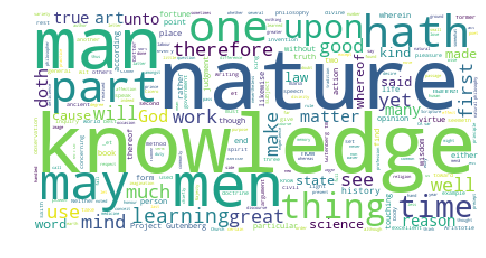

In [7]:
# Set up the figure dimensions and then display the word cloud
rcp['figure.figsize'] = 8, 16
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
# since the book was written in 1605, our stop words and theirs do not always overlap
stopwords.update(['hath', 'therefore', 'may', 'doth', 'though', 'upon', 'For', 'I', 'But', 'And', 
                  'yet', 'men', 'The', 'much', 'unto', 'use', 'see', 'So', 'good', 'great', 'many', 
                  'things', 'first', 'make', 'part', 'one', 'two'])
# the list of stopwords can be extensive, therefore updating it should be driven by each business
wordcloud = wc(stopwords = stopwords, max_words = 1942,
              background_color = "black").generate(book_data) # the max word is of my choosing

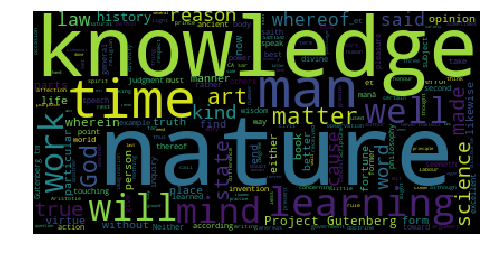

In [9]:
# Display the figure without the stopwords
rcp['figure.figsize'] = 8, 16
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Depending on your situation, business requirements for the analysis, etc., words such as 'man', 'men' may be deemed unnecessary or even sexist, and therefore further identification of stopwords may be necessary.
Terms such as 'knowledge', 'nature', 'man', 'learning' feature prominently because, well, Bacon wrote about learning and knowledge. Further, it was 1605 and society was a lot more sexist.
At this point, you may need to analyze the most frequently mentioned terms further. One option is a simple count that can be visualized on a bar chart.

In [10]:
# Set up lists of terms for visualization
targeted_terms = [term for term in book_data.split() if term not in stopwords] 
counted_terms = collections.Counter(targeted_terms)
terms = []
counts = []

for term, count in counted_terms.most_common(10):
    terms.append(term)
    counts.append(count)

<BarContainer object of 10 artists>

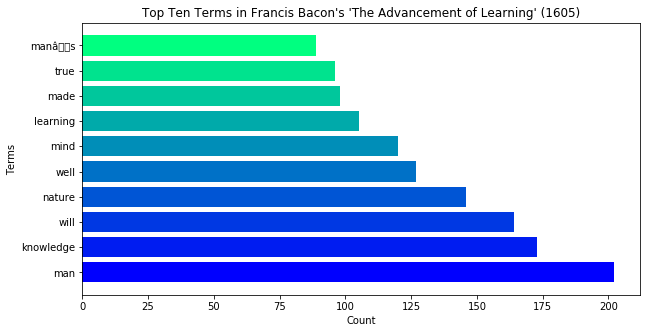

In [11]:
colors = cm.winter(np.linspace(0, 1, 10))
rcp['figure.figsize'] = 10, 5
plt.title("Top Ten Terms in Francis Bacon's 'The Advancement of Learning' (1605)" )
plt.xlabel('Count')
plt.ylabel('Terms')
plt.barh(terms, counts, color = colors)

# Summary

As expected, terms such as 'knowledge', 'nature', 'man', 'learning' feature prominently.
This may provide input for further analysis with or among the affected participants.
The book has more than 82,000 words but only a fraction was included in the analysis. 
In a real business situation, text with many more words may need to be analyzed.
You may also use a pre-populated list of stopwords for filtering.
The text does not have to be from a book as demonstrated in this exercise: it can be exchanges from a company's Yammer portal, a long email chain among employees, or some other repository.


Some decisions boil down to analysis objectives. For instance, the term "man" appears almost as often as "men", but again, the historical context of Bacon's environment likely explains that. In this analysis, the term 'men' was placed in the stopword list and the term 'man' was included.

The concepts 'learning', 'mind', 'nature', 'will', 'knowledge', etc frequently appear in philosophical attempts to answer the question "what is knowledge?". It is therefore not surprising that they feature in the top ten.

# Conclusion

Using Francis Bacon's "The Advancement of Learning", this exercise illustrated web scraping, creation of wordclouds, creation of stopwords, and visualization using python, numpy, matplotlib, requests, collections, and wordcloud.